In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

data = pd.read_csv('modx_site_content.csv', sep=';', header=0)
categories_df = data[((data['template'] == 8) | (data['template'] == 15) | (data['template'] == 11) | (data['template'] == 22) | (data['template'] == 26)) & (data['published'] == 1) & (categories_df['pagetitle'] != 'Новинки')]
products_df = data[(data['template'] == 9) & (data['published'] == 1)]
cities = data[data['template'] == 24]['id'].to_numpy()
new_table = pd.DataFrame({'id_prod':[], 'id_city':[], 'id1':[], 'id2':[], 'id3':[], 'id4':[], 'id5':[]})
cat_table = pd.DataFrame({'id_cat':[], 'id_city':[], 'id1':[], 'id2':[], 'id3':[], 'id4':[], 'id5':[]})
table2 = pd.DataFrame({'id_prod':[], 'id_city':[], 'id0':[], 'id1':[], 'id2':[], 'id3':[], 'id4':[]})

In [ ]:
categories_df

,id,type,contentType,pagetitle,longtitle,description,alias,link_attributes,published,pub_date,unpub_date,parent,isfolder,introtext,content,richtext,template,menuindex,searchable,cacheable,createdby,createdon,editedby,editedon,deleted,deletedon,deletedby,publishedon,publishedby,menutitle,donthit,haskeywords,hasmetatags,privateweb,privatemgr,content_dispo,hidemenu,alias_visible
14,17,document,text/html,Клапаны обратные,Клапаны обратные (поворотные),NaN,klapanyi-obratnyie,NaN,1,0,0,606,1,NaN,<p>В современных трубопроводных системах для п...,1,8,50,1,1,1,1392023010,1,1596444003,0,0,0,1392023010,1,Клапаны обратные,0,0,0,0,0,0,0,1
17,20,document,text/html,Краны шаровые,Краны шаровые,NaN,kranyi-sharovyie,NaN,1,0,0,606,1,NaN,<p>Кран шаровой &ndash; является новейшим совр...,1,8,70,1,1,1,1392023044,1,1556624612,0,0,0,1392023044,1,Краны шаровые,0,0,0,0,0,0,0,1
18,21,document,text/html,Фильтры,Фильтры сетчатые,NaN,filtryi,NaN,1,0,0,606,1,NaN,<p>Фильтры сетчатые используются для защиты эл...,1,8,20,1,1,1,1392023056,1,1587122187,0,0,0,1392023056,1,Фильтры,0,0,0,0,0,0,0,1
19,22,document,text/html,Нестандартные изделия,Нестандартные изделия,NaN,nestandartnyie-izdeliya,NaN,1,0,0,606,0,NaN,"<p><span>На сегодняшний день, имеем возможност...",1,15,60,1,1,1,1392023066,1,1556624602,0,0,0,1392023066,1,Нестандартные изделия,0,0,0,0,0,0,1,1
21,24,document,text/html,Конденсатоотводчики,Конденсатоотводчики,NaN,kondensatootvodchiki,NaN,1,0,0,606,1,NaN,NaN,1,8,80,1,1,1,1392023087,1,1587121729,0,0,0,1392023087,1,Конденсатоотводчики,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,826,document,text/html,Гасители пульсаций,Гасители пульсаций,NaN,gasiteli-pulsacij-dempfernye-ustrojstva,NaN,1,0,0,110,0,NaN,NaN,1,8,12,1,1,1,1592303389,1,1592804049,1,1592804116,1,1592303389,1,Гасители пульсаций,0,0,0,0,0,0,0,1
724,828,document,text/html,Аксессуары для мембранных разделителей,Аксессуары для мембранных разделителей,NaN,aksessuary-dlya-membrannyh-razdelitelej,NaN,1,0,0,110,1,NaN,NaN,1,8,13,1,1,1,1592557560,1,1593148458,0,0,0,1592557560,1,Аксессуары для мембранных разделителей,0,0,0,0,0,0,0,1
741,845,document,text/html,Калибраторы температуры жидкостные с измерител...,Калибраторы температуры жидкостные с измерител...,NaN,kalibratory-temperatury-zhidkostnye-s-izmerite...,NaN,1,0,0,598,1,NaN,<p>Калибраторы температуры жидкостные серии ЭЛ...,1,8,19,1,1,1,1595586112,1,1596521139,0,0,0,1595586112,1,Калибраторы температуры жидкостные с измерител...,0,0,0,0,0,0,0,1
748,852,document,text/html,Вентили игольчатые 54 серия,Вентили игольчатые 54 серия,NaN,ventili-igolchatye-54-seriya,NaN,1,0,0,609,1,NaN,NaN,1,8,2,1,1,1,1596715795,1,1596715795,0,0,0,1596715795,1,Вентили игольчатые 54 серия,0,0,0,0,0,0,0,1


In [ ]:
def check_active(row):
  if row['published'] == 0:
    return '0'
  if row['published'] == 1 and row['parent'] == 0:
    return '1'
  else:
    return check_active(data[data['id'] == row['parent']].iloc[0])
#products_df['active'] = True
products_df['active'] = products_df.apply(check_active, axis=1)
categories_df['active'] = categories_df.apply(check_active, axis=1)
products_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,type,contentType,pagetitle,longtitle,description,alias,link_attributes,published,pub_date,unpub_date,parent,isfolder,introtext,content,richtext,template,menuindex,searchable,cacheable,createdby,createdon,editedby,editedon,deleted,deletedon,deletedby,publishedon,publishedby,menutitle,donthit,haskeywords,hasmetatags,privateweb,privatemgr,content_dispo,hidemenu,alias_visible,active
22,26,document,text/html,УЛМ-11,УЛМ-11,NaN,ulm-11,NaN,1,0,0,11,0,УЛМ-11 - Задачи любой сложности - единое решение.,<p>Высокоточный бесконтактный радарный уровнем...,1,9,0,1,1,1,1392027410,1,1554365920,0,0,0,1392027410,1,УЛМ-11,0,0,0,0,0,0,1,1,0
23,27,document,text/html,УЛМ-11А1,УЛМ-11А1,NaN,ulm-11a1,NaN,1,0,0,11,0,NaN,<p>Бесконтактный радарный уровнемер УЛМ-11А1 о...,1,9,1,1,1,1,1392101701,1,1554365929,0,0,0,1392101701,1,УЛМ-11А1,0,0,0,0,0,0,1,1,0
24,28,document,text/html,УЛМ-31А1,УЛМ-31А1,NaN,ulm-31a1,NaN,1,0,0,11,0,NaN,<p>Компактный удобный&nbsp;радарный&nbsp;уровн...,1,9,2,1,1,1,1392101806,1,1554365938,0,0,0,1392101806,1,УЛМ-31А1,0,0,0,0,0,0,1,1,0
48,53,document,text/html,Клапана обратные осесимметричные,Клапана обратные осесимметричные,NaN,klapana-obratnyie-osesimmetrichnyie,NaN,1,0,0,17,0,NaN,NaN,1,9,0,1,1,1,1392187228,1,1596443891,0,0,0,1392187228,1,Клапана обратные осесимметричные,0,0,0,0,0,0,0,1,1
49,54,document,text/html,Клапана обратные поворотные под приварку типа ...,Клапана обратные поворотные под приварку типа ...,NaN,klapana-obratnyie-povorotnye-pod-privarku-tipa...,NaN,1,0,0,17,0,NaN,NaN,1,9,1,1,1,1,1392187337,1,1596443565,0,0,0,1392187337,1,Клапана обратные поворотные под приварку типа ...,0,0,0,0,0,0,0,1,1


In [ ]:
products = products_df[products_df['active'] == '1']['id'].to_numpy()
categories = categories_df[categories_df['active'] == '1']['id'].to_numpy()

In [ ]:
for city in cities:
  for prod in products:
    #np.random.seed(city * prod)
    #row_arr = np.sort(np.random.choice(id_product_list, 5))
    #row = np.array2string(row_arr, separator=',')
    #new_table = new_table.append({'id_prod':prod, 'id_city':city, 'prod_list':row, 'id1':row_arr[0], 'id2':row_arr[1], 'id3':row_arr[2], 'id4':row_arr[3], 'id5':row_arr[4]}, ignore_index=True)
    table2 = table2.append({'id_prod':prod, 'id_city':city, 'id0':'', 'id1':'', 'id2':'', 'id3':'', 'id4':''}, ignore_index=True)


In [ ]:
table2.shape

(11920, 7)

In [ ]:
table2.loc[0, ['id0', 'id1']] = 1, 2
table2.loc[0]

id_prod     53
id_city    759
id0          1
id1          2
id2           
id3           
id4           
Name: 0, dtype: object

In [ ]:
cnt_max = table2.shape[0]
cnt = 0
for i in combinations(products, 5):
  table2.loc[cnt, ['id0', 'id1', 'id2', 'id3', 'id4']] = i
  cnt += 1
  if cnt == cnt_max:
    break

In [ ]:
table2

,id_prod,id_city,id0,id1,id2,id3,id4
0,53.0,759.0,53,54,55,56,63
1,54.0,759.0,53,54,55,56,64
2,55.0,759.0,53,54,55,56,65
3,56.0,759.0,53,54,55,56,66
4,63.0,759.0,53,54,55,56,67
...,...,...,...,...,...,...,...
11915,859.0,799.0,53,54,55,150,683
11916,860.0,799.0,53,54,55,150,685
11917,861.0,799.0,53,54,55,150,687
11918,862.0,799.0,53,54,55,150,688


In [ ]:
table2.to_csv('prods.csv', sep=';')

In [ ]:
for city in cities:
  for prod in products:
    np.random.seed(city * prod)
    #row_arr = np.sort(np.random.choice(products, 5))
    row_arr = np.random.choice(products, 5)
    #row = np.array2string(row_arr, separator=',')
    new_table = new_table.append({'id_prod':prod, 'id_city':city, 'id1':row_arr[0], 'id2':row_arr[1], 'id3':row_arr[2], 'id4':row_arr[3], 'id5':row_arr[4]}, ignore_index=True)

In [ ]:
new_table.astype(int).to_csv('prods2.csv', sep=';')

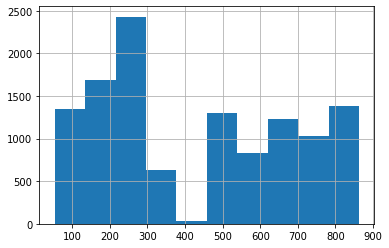

In [ ]:
new_table['id1'].hist()

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
b = np.array(list(combinations(a, 3)))

In [ ]:
b_d = pd.DataFrame(b, columns=['a', 'b', 'c'])

In [ ]:
b_d.groupby('a').count()['b'] + b_d.groupby('b').count()['c'] + b_d.groupby('c').count()['a']

1      NaN
2      NaN
3     91.0
4     91.0
5     91.0
6     91.0
7     91.0
8     91.0
9     91.0
10    91.0
11    91.0
12    91.0
13    91.0
14     NaN
15     NaN
dtype: float64

In [ ]:
def combinations_g(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield tuple(pool[i] for i in indices)

In [ ]:
some_list = []
cnt = 0
for i in range(len(a)):
  some_list.append()

TypeError: ignored

In [ ]:
categories
for city in cities:
  for cat in categories:
    np.random.seed(city * cat)
    row_arr = np.random.choice(categories, 5)
    cat_table = cat_table.append({'id_cat':cat, 'id_city':city, 'id1':row_arr[0], 'id2':row_arr[1], 'id3':row_arr[2], 'id4':row_arr[3], 'id5':row_arr[4]}, ignore_index=True)


In [ ]:
cat_table = cat_table.astype(int)

In [ ]:
cat_table.to_csv('cat.csv', sep=';')